# Final Project Proposal - Customer churn

By Shichao Zhou

# Abstract

The issue of Customer churn analysis and prediction in the telecom sector cannot be ignored in the current business environment because it's essential for telecommunication industries to analyze behaviors of the various customer to predict which customers are about to leave the subscription telecom company. So this study will follow an entire data science life cycle to focus on machine learning techniques for predicting customer churn. I build the classification models, which are KNN, decision tree, XGboost, and an ensemble model and compare these models' performance. The primary outcome is that the ensemble model can classify most of the observations in the testing set and the testing accuracy is higher than the training set accuracy.

# Introduction

As disruptive technical progress, the various SaaS, cable service providers, online stores, or online borrowing services providers and telecommunication companies appear and raise the level of competition. This crowded market has caused these companies' stakeholders to work hard to survive in this competitive market. For service-oriented companies,customer-related data is one of their wealth codes. In more exact words, suppose a company wants to guarantee a steady increase in profits every quarter or maximize profits in a fiercely competitive environment. In that case, it cannot ignore the critical metric of customer churn.This project contains information about a telco company that provided home phone and Internet services to 7043 customers in California in Q3. I will go through the dataset and analyze the data relevant to customer churn. I hope to take this data set as an example and follow an entire data science life cycle to provide insights and implement the results in the "real world."

The dataset we will be using is called WA_Fn-UseC_-Telco-Customer-Chur. The source is from IBM. The dataset can be directly downloaded from the below link.
(https://community.ibm.com/accelerators/catalog/content/Customer-churn ). The data dictionary explanation can be found on the below link(https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113 )

## Research Question
- __Which model has the best performance to predict whether customers churn or not?__
- __Did the preferred model perform as well as expected?__

Steps

1) Data Profiling

2) Exploratory Data Analysis

3) Data Preparation

4) Preped Data Review

5) Modeling

6) Post-Modeling Exploratory Data Analysis

7) Select Models

8) Conclusions

# Data dictionary

- LoyaltyID: A unique ID that identifies each customer.
- CustomerID: A unique ID that identifies each customer.
- Senior Citizen: Indicates if the customer is 65 or older: Yes, No
- Partner: Indicate if the customer has a partner: Yes, No
- Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.
- Tenure: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.
- Phone Service: Indicates if the customer subscribes to home phone service with the company: Yes, No
- Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No
- Internet Service: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.
- Online Security: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No
- Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No
- Device Protection: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No
- Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No
- Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.
- Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.
- Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.
- Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No
- Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check
- Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.
- Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.
- Churn Label: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.

In [1]:
# Load all the libraries that are needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import MinMaxScaler
import scipy
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier as XGBC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC
from matplotlib import pyplot
from sklearn.metrics import accuracy_score
#warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
# Start by reading a set of sample data from github. 
df = pd.read_csv("https://raw.githubusercontent.com/sczhou0705/DAV-6150-2/main/CustomerChurn%20(1).csv")
# Check the dataset size
print("dataset shape",df.shape)
df.head()

dataset shape (7043, 21)


,LoyaltyID,Customer ID,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,318537,7590-VHVEG,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,152148,5575-GNVDE,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,326527,3668-QPYBK,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,845894,7795-CFOCW,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,503388,9237-HQITU,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Drop non-predictive variables
df = df.drop(df.columns[[0,1]],axis=1)
df.head(1)

,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Senior Citizen     7043 non-null   object 
 1   Partner            7043 non-null   object 
 2   Dependents         7043 non-null   object 
 3   Tenure             7043 non-null   int64  
 4   Phone Service      7043 non-null   object 
 5   Multiple Lines     7043 non-null   object 
 6   Internet Service   7043 non-null   object 
 7   Online Security    7043 non-null   object 
 8   Online Backup      7043 non-null   object 
 9   Device Protection  7043 non-null   object 
 10  Tech Support       7043 non-null   object 
 11  Streaming TV       7043 non-null   object 
 12  Streaming Movies   7043 non-null   object 
 13  Contract           7043 non-null   object 
 14  Paperless Billing  7043 non-null   object 
 15  Payment Method     7043 non-null   object 
 16  Monthly Charges    7043 

In [5]:
# Change object to numercic data type
#df_num['Total Charges'] = pd.to_numeric(df_num['Total Charges'], errors='coerce')
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

In [6]:
df.isna().sum()

Senior Citizen        0
Partner               0
Dependents            0
Tenure                0
Phone Service         0
Multiple Lines        0
Internet Service      0
Online Security       0
Online Backup         0
Device Protection     0
Tech Support          0
Streaming TV          0
Streaming Movies      0
Contract              0
Paperless Billing     0
Payment Method        0
Monthly Charges       0
Total Charges        11
Churn                 0
dtype: int64

In [7]:
# Fill missing data with 0.
df2 = df['Total Charges'] = df['Total Charges'].fillna(0)

# EDA

In [8]:

data_type = pd.Series(['Categorical','Categorical','Categorical','Numerical','Categorical','Categorical','Categorical',
                      'Categorical','Categorical','Categorical','Categorical','Categorical','Categorical','Categorical',
                      'Categorical','Categorical','Numerical','Numerical','Categorical'])

In [9]:
# Output each variable data type
df_type = pd.concat([pd.DataFrame(df.columns), data_type.rename('Data types')], axis=1)
df_type.rename({0: 'Variables'}, axis='columns')

,Variables,Data types
0,Senior Citizen,Categorical
1,Partner,Categorical
2,Dependents,Categorical
3,Tenure,Numerical
4,Phone Service,Categorical
5,Multiple Lines,Categorical
6,Internet Service,Categorical
7,Online Security,Categorical
8,Online Backup,Categorical
9,Device Protection,Categorical


In [10]:
df.iloc[:,[3,16,17]].describe()

,Tenure,Monthly Charges,Total Charges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


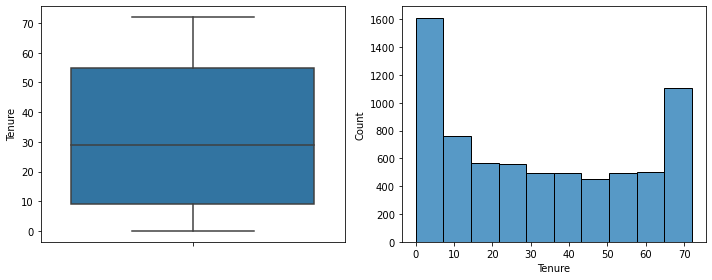

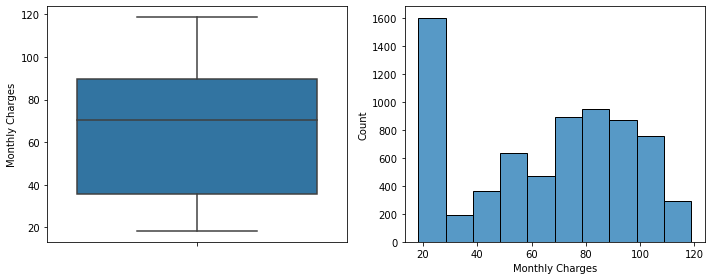

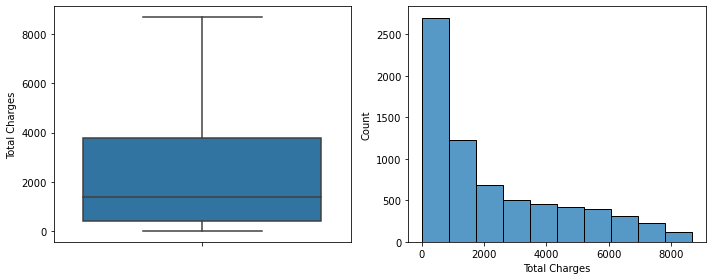

In [11]:
# Histogram plot for numerical data
for col in df.iloc[:,[3,16,17]].columns:
    fig, axes = plt.subplots(1, 2,figsize=(10,4))
    sns.histplot(data=df.iloc[:,[3,16,17]], ax=axes[1], x = col, bins=10)
    sns.boxplot(ax=axes[0], y = col, data = df.iloc[:,[3,16,17]],orient='v')
    plt.tight_layout()

- The numerical variables have quite different scales with each other and they are not normal distribution. From the above boxplot and statistical description, we can see that customer tenure has a mean of 32, while monthly charges has a mean of 65 and total charges has a mean of 2279.  In the following data preparation step, I will standardize these numerical features to be on the same scale because some of classifiers are distance-based,for example, Knearest neighbors.
- As can be seen from the boxplot, there are no exaggerated outliers.
 

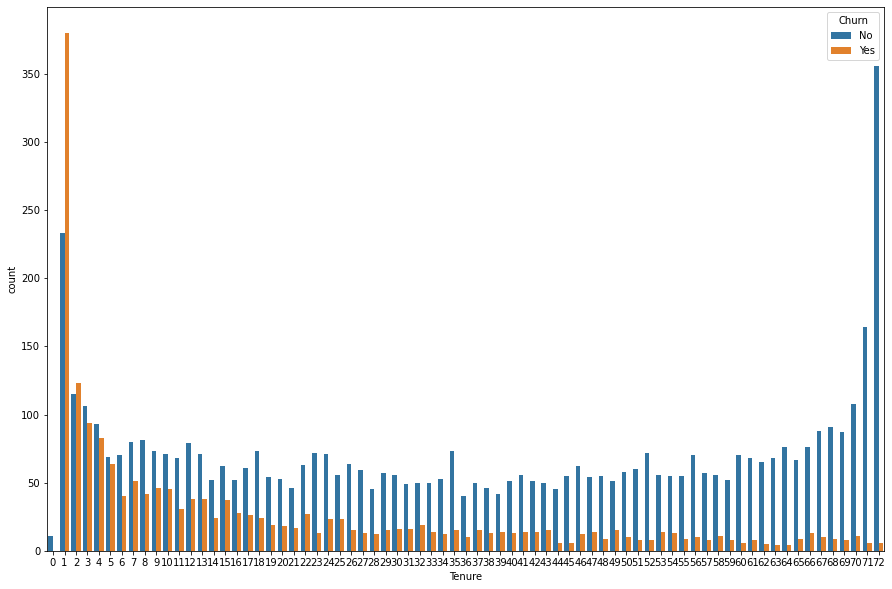

In [12]:
# Show the plot of numerical variables with target variable.
plt.figure(figsize=(15, 10))
sns.countplot(x = 'Tenure', hue = 'Churn',data = df);

The number of x-axis represent tenure in months. The number of churn is very higher in the first 3 months.
The longer the customer uses the company's services, the number of churns will decrease.

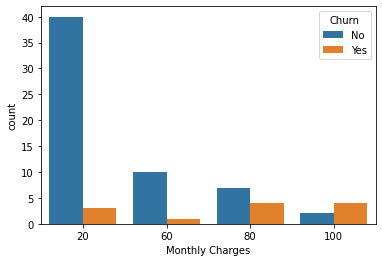

In [13]:
sns.countplot(x = 'Monthly Charges', hue = 'Churn',data = df,order=[20,60,80,100]);

When the monthly charge is around 100, the total number of churns is greater than the number without churns. When the monthly charge is between 20-80, the number of customers churn is less than the number of churns without churns.

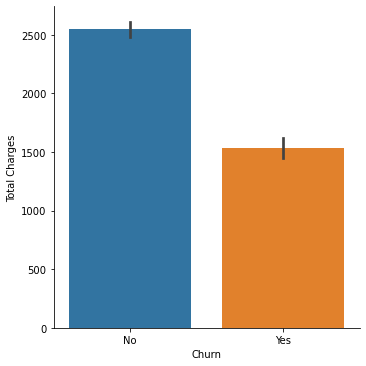

In [14]:
sns.catplot(x = 'Churn', y = 'Total Charges',kind="bar",data = df);

The total charges of sample is imbalanced.

In [15]:
# Show the correlation between numerical variables.
df.iloc[:,[3,16,17]].corr()

,Tenure,Monthly Charges,Total Charges
Tenure,1.000000,0.247900,0.826178
Monthly Charges,0.247900,1.000000,0.651174
Total Charges,0.826178,0.651174,1.000000


Acorrding to the data dictionary discription and correlation,the attribute 'Tenure' is highly positive relationship to 'total charges'.

In case of collinearity, I will not consider use total charges as one of the features in the following modeling training.

In [16]:
df['Churn'] = np.where(df['Churn']=='Yes',1,0)

In [17]:
# Point-biserial correlation measure the relationship between a binary response variable(Churn), and continuous variables, x.
corr_list = []
p_value = []
y = list(df['Churn'])
for column in df.iloc[:,[3,16]]:
    x=df[column]
    pb = stats.pointbiserialr(list(x), list(y))
    corr_list.append(pb[0])
    p_value.append(pb[1])
pointbiserialr_matrix = pd.concat([pd.DataFrame(corr_list,columns=['Churn_correlation']),pd.DataFrame(p_value,columns=['Churn_Pvalue'])],axis=1)
pointbiserialr_matrix.rename(index={0: "Tenure", 1: "Monthly Charges"})

,Churn_correlation,Churn_Pvalue
Tenure,-0.352229,7.999058e-205
Monthly Charges,0.193356,2.706646e-60


The above point-biserial table is used to measure the strength and direction of the association between continuous variables and binary response variable(churn). Among the two correlation coefficients, tenure has the top highly negatives correlated variable with Churn. Monthly charges has slightly positive relationship with churn. Both of the explanatory variables' p-values are lower than the threshold 0.05,so they are significant and cannot be ingored in the following feature selection. 

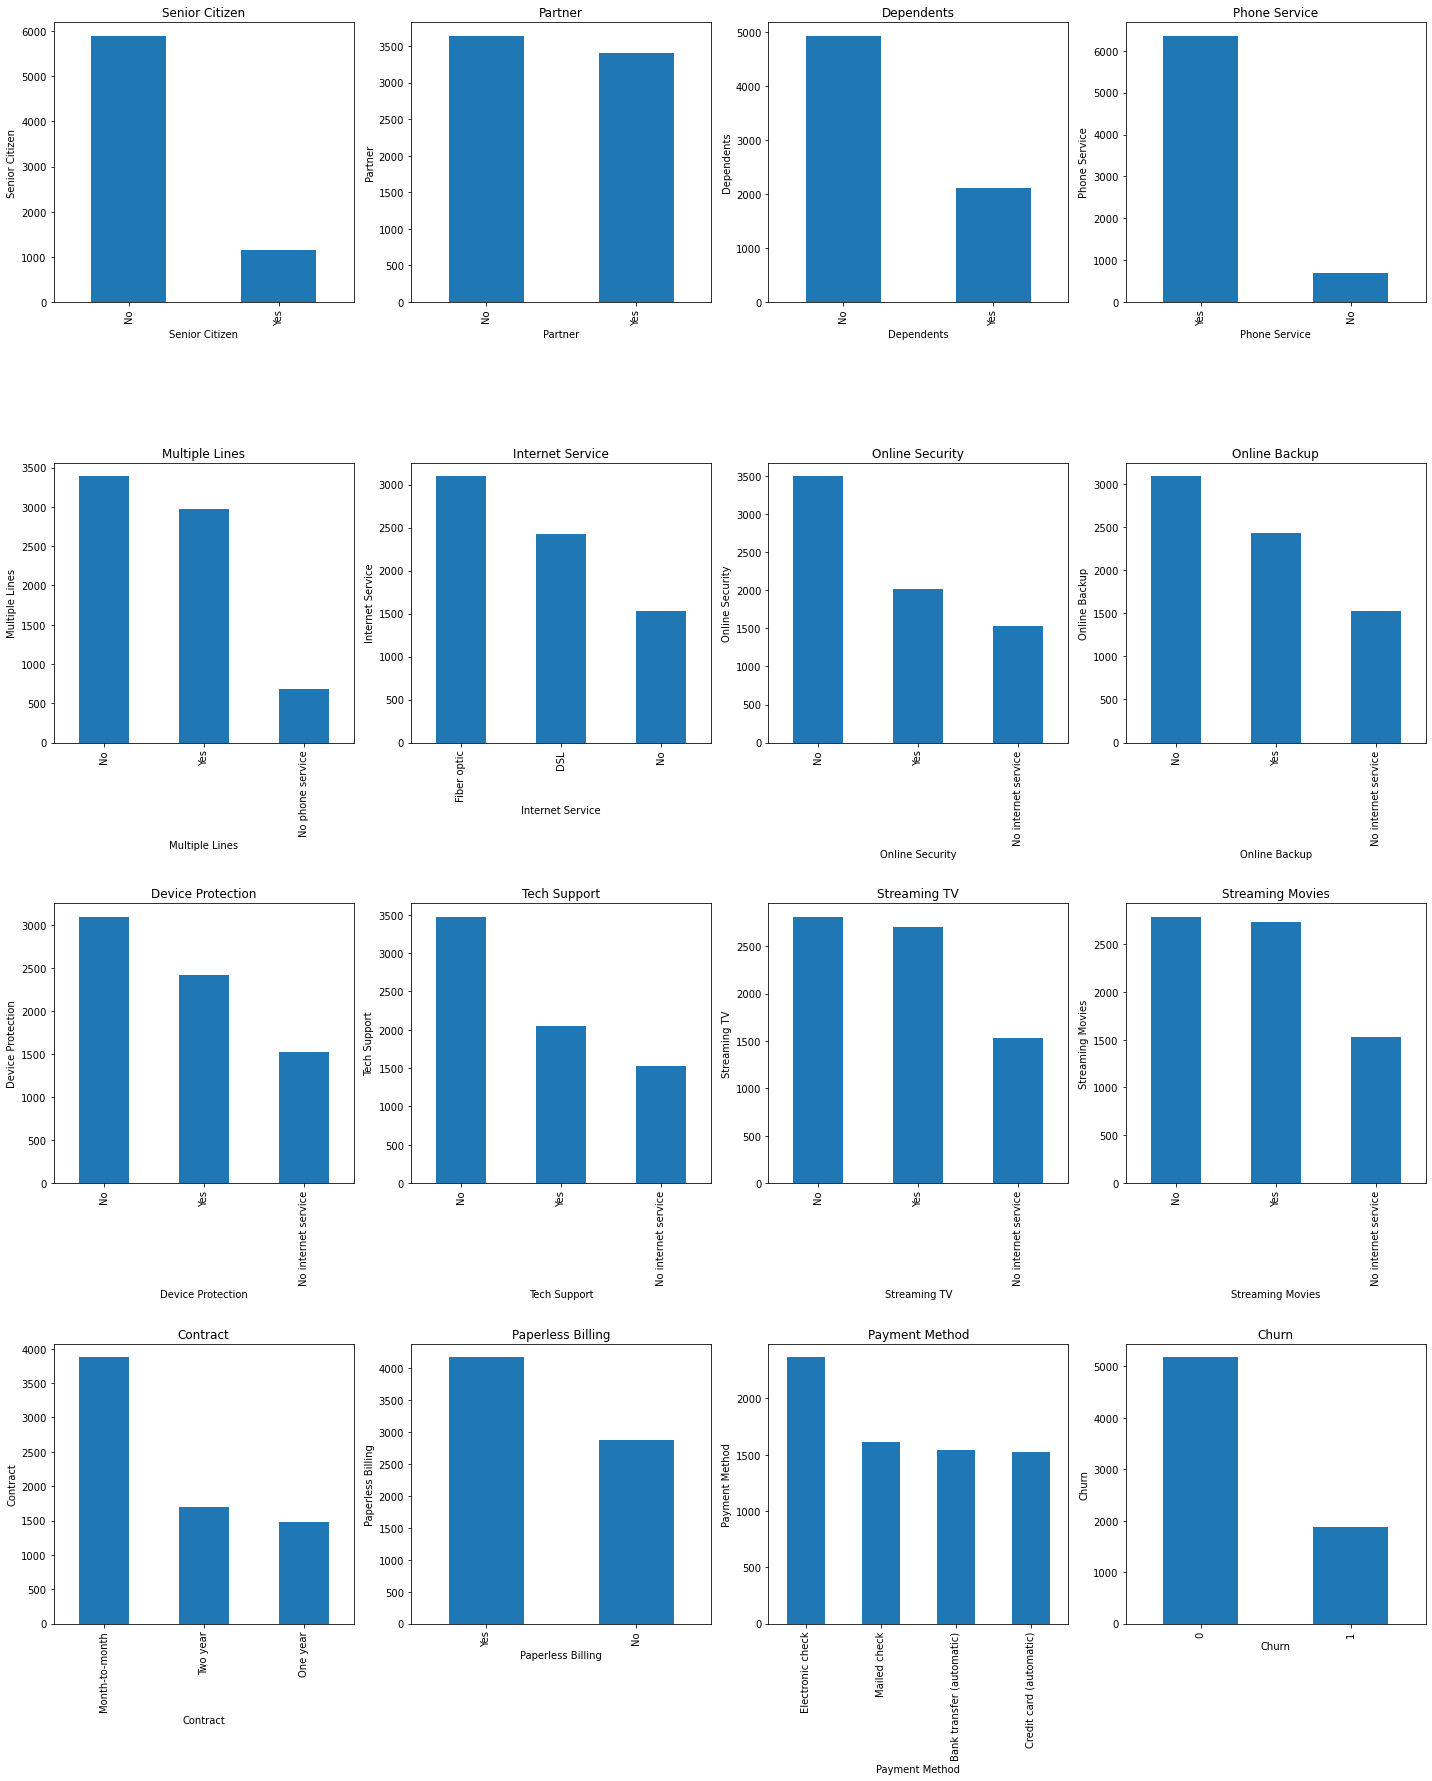

In [18]:
# Categorical data
data_cat = df.iloc[:,[0,1,2,4,5,6,7,8,9,10,11,12,13,14,15,18]]
plt.figure(figsize = (20, 35))
for i, col in enumerate(data_cat):
    plt.subplot(6,4, i + 1)
    data_cat[col].value_counts().plot(kind='bar')
    plt.tight_layout()
    plt.title(str(col))
    plt.xlabel(col)
    plt.ylabel(col)

- The each class of each attribute is imbalanced.

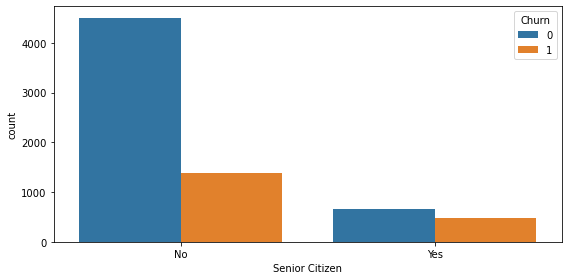

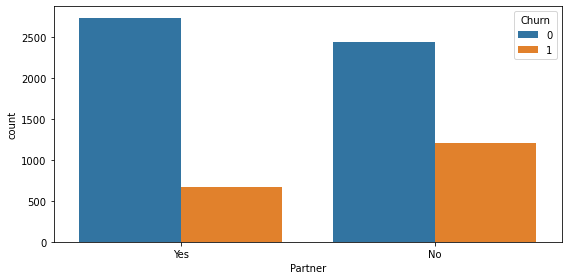

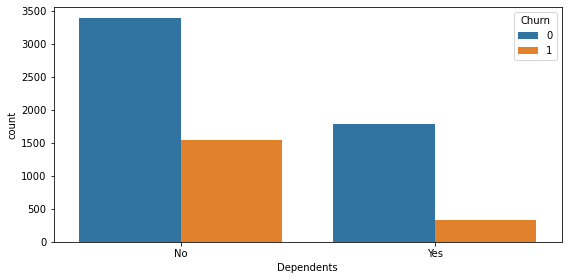

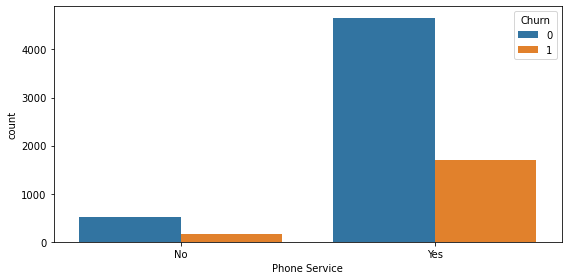

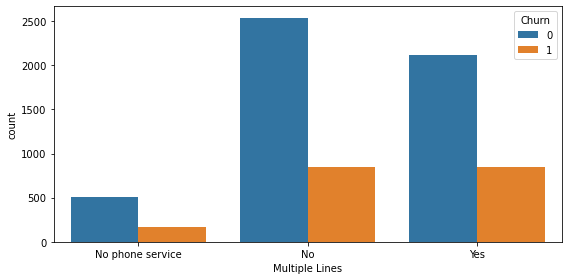

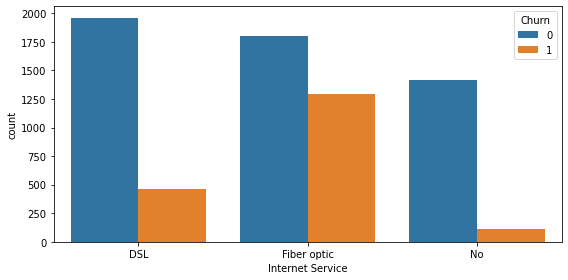

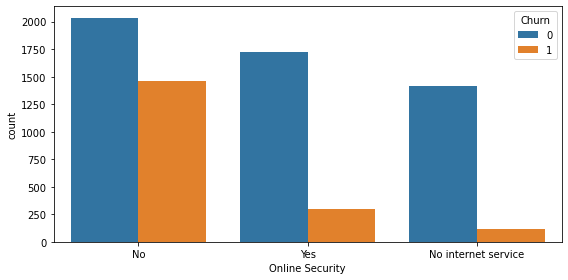

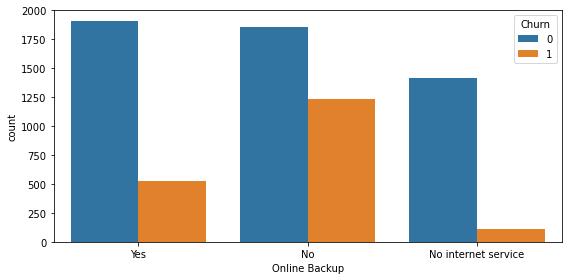

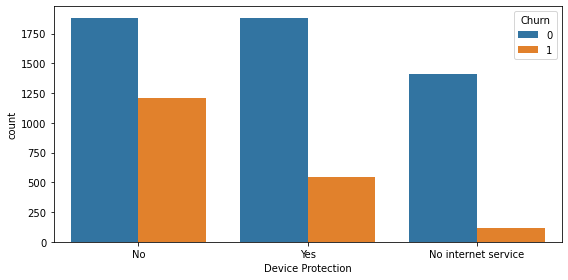

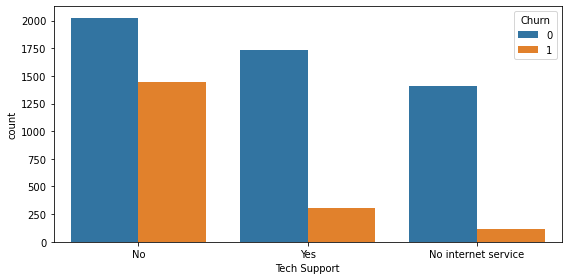

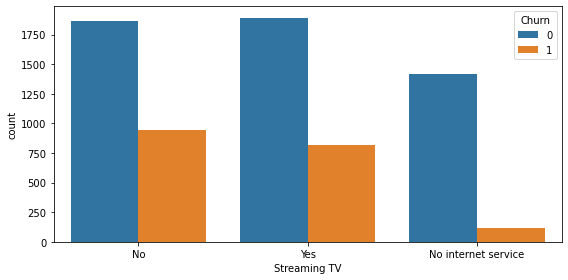

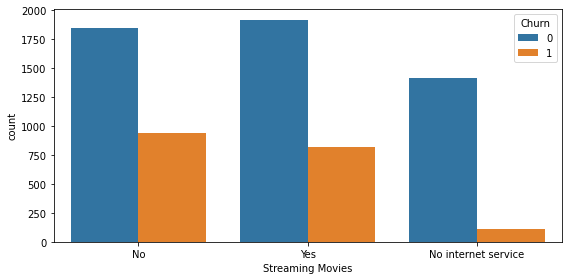

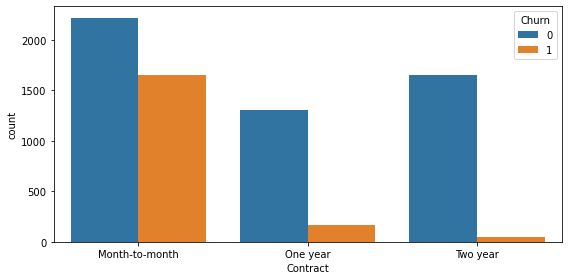

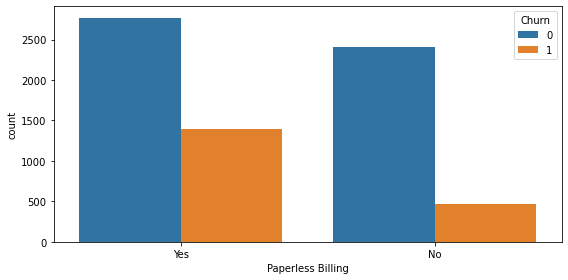

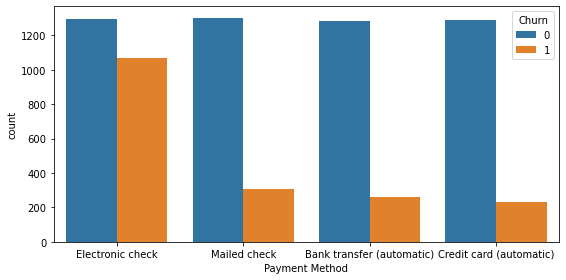

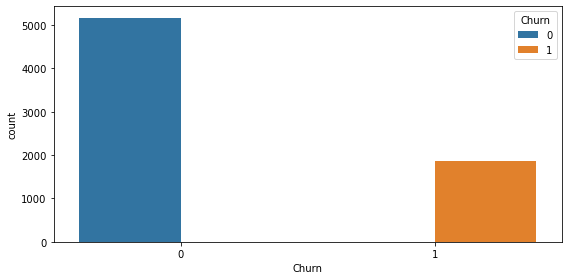

In [19]:
# Distribution of categorical data with 'Churn'.
for col in data_cat.columns:
    plt.figure(figsize=(8, 4))
    ax = sns.countplot(x=col, hue='Churn',data=data_cat)
    plt.tight_layout()

- Senior citizen,partner,and dependents do not have high churn.
- Customers without using phone service have less churn than those with using phone service.
- Regardless of whether multiple lines are used, the number of churns is very close. We can see that the attribute is not a contributing factor for customer churn in this data set
- Customer using Fiber optic service have a high churn than DSL.
- Customer without using online security have more churn than those with using online security.
- Customer without online backup have more churn than those with using online backup and those without internet service.
- Customer without device protection have more churn than those with applying device protection and those without internet service.
- Customers who do not choose tech support have churned more than those have applied tech support and those who do not have internet service.
- Whether streaming TV and streaming movies are used, the number of churns is not very different. We can see that the attribute is not a contributing factor for customer churn in this data set.
- Customer with longer contracts have less churn as opposed to customer who choose month-to-month and one year contract.
- Customer with paperless billing have more churn than those without paperless billing.
- Customer who use electronic check have more churn than mailed check,bank transfer and credit card.However, mailed check,bank transfer and credit card are not strong contributing factors for customer churn in this data set as the numbers of payment method that have or haven’t churned, are almost the same.
- The target response is imbalanced.

# Data Preparation

In this section, we will do the following steps based on the EDA.
- Get dummy variables for categorical data
- MinMax standardize numerical data

In [20]:
data_cat.nunique()

Senior Citizen       2
Partner              2
Dependents           2
Phone Service        2
Multiple Lines       3
Internet Service     3
Online Security      3
Online Backup        3
Device Protection    3
Tech Support         3
Streaming TV         3
Streaming Movies     3
Contract             3
Paperless Billing    2
Payment Method       4
Churn                2
dtype: int64

In [21]:
data_cat.replace('Yes',1,inplace=True)
data_cat.replace('No',0,inplace=True)

In [22]:
data_cat_update = pd.get_dummies(data_cat,columns=['Multiple Lines','Internet Service','Online Security','Online Backup',
                                                   'Device Protection','Tech Support','Streaming TV','Streaming Movies','Contract','Payment Method'])
data_cat_update.head(1)

,Senior Citizen,Partner,Dependents,Phone Service,Paperless Billing,Churn,Multiple Lines_0,Multiple Lines_1,Multiple Lines_No phone service,Internet Service_0,Internet Service_DSL,Internet Service_Fiber optic,Online Security_0,Online Security_1,Online Security_No internet service,Online Backup_0,Online Backup_1,Online Backup_No internet service,Device Protection_0,Device Protection_1,Device Protection_No internet service,Tech Support_0,Tech Support_1,Tech Support_No internet service,Streaming TV_0,Streaming TV_1,Streaming TV_No internet service,Streaming Movies_0,Streaming Movies_1,Streaming Movies_No internet service,Contract_Month-to-month,Contract_One year,Contract_Two year,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0


In [23]:
data_cat_update['Churn_label'] = df['Churn']

In [24]:
data_cat_update.head()

,Senior Citizen,Partner,Dependents,Phone Service,Paperless Billing,Churn,Multiple Lines_0,Multiple Lines_1,Multiple Lines_No phone service,Internet Service_0,Internet Service_DSL,Internet Service_Fiber optic,Online Security_0,Online Security_1,Online Security_No internet service,Online Backup_0,Online Backup_1,Online Backup_No internet service,Device Protection_0,Device Protection_1,Device Protection_No internet service,Tech Support_0,Tech Support_1,Tech Support_No internet service,Streaming TV_0,Streaming TV_1,Streaming TV_No internet service,Streaming Movies_0,Streaming Movies_1,Streaming Movies_No internet service,Contract_Month-to-month,Contract_One year,Contract_Two year,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,Churn_label
0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0
1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,1,1,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0
4,0,0,0,1,1,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1


In [25]:
data_cat_update = data_cat_update.drop(data_cat_update.columns[[5]],axis=1)

In [26]:
# Minmax scale numerical data
scaler = MinMaxScaler()
result = scaler.fit_transform(df.iloc[:,[3,16]])
data_num_st = pd.DataFrame(result,columns =['Tenure','Monthly Charges'])
data_num_st

,Tenure,Monthly Charges
0,0.013889,0.115423
1,0.472222,0.385075
2,0.027778,0.354229
3,0.625000,0.239303
4,0.027778,0.521891
...,...,...
7038,0.333333,0.662189
7039,1.000000,0.845274
7040,0.152778,0.112935
7041,0.055556,0.558706


In [27]:
df_updated = pd.concat([data_num_st,data_cat_update],axis=1)
df_updated.shape 

(7043, 39)

In [28]:
df_updated

,Tenure,Monthly Charges,Senior Citizen,Partner,Dependents,Phone Service,Paperless Billing,Multiple Lines_0,Multiple Lines_1,Multiple Lines_No phone service,Internet Service_0,Internet Service_DSL,Internet Service_Fiber optic,Online Security_0,Online Security_1,Online Security_No internet service,Online Backup_0,Online Backup_1,Online Backup_No internet service,Device Protection_0,Device Protection_1,Device Protection_No internet service,Tech Support_0,Tech Support_1,Tech Support_No internet service,Streaming TV_0,Streaming TV_1,Streaming TV_No internet service,Streaming Movies_0,Streaming Movies_1,Streaming Movies_No internet service,Contract_Month-to-month,Contract_One year,Contract_Two year,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,Churn_label
0,0.013889,0.115423,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0
1,0.472222,0.385075,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0
2,0.027778,0.354229,0,0,0,1,1,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1
3,0.625000,0.239303,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0
4,0.027778,0.521891,0,0,0,1,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.333333,0.662189,0,1,1,1,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
7039,1.000000,0.845274,0,1,1,1,1,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0
7040,0.152778,0.112935,0,1,1,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0
7041,0.055556,0.558706,1,1,0,1,1,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1


# Prepped Data Review

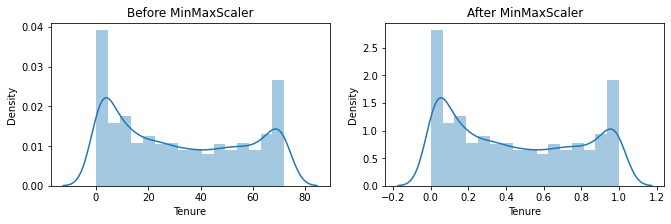

In [29]:
# MinMaxScaler before and after
fig = plt.figure(figsize=(11,3))
plt.subplot(1, 2, 1)
sns.distplot(df['Tenure']);
plt.title("Before MinMaxScaler");

plt.subplot(1, 2, 2)
sns.distplot(data_num_st['Tenure']);
plt.title("After MinMaxScaler");


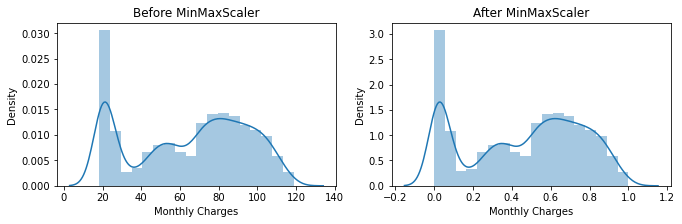

In [30]:
fig = plt.figure(figsize=(11,3))
plt.subplot(1, 2, 1)
sns.distplot(df['Monthly Charges']);
plt.title("Before MinMaxScaler");

plt.subplot(1, 2, 2)
sns.distplot(data_num_st['Monthly Charges']);
plt.title("After MinMaxScaler");


After standardization, the data are all in the same range. The distribution of the dataset has not changed.

# Feature selection

For numerical data, I will use EDA results and choose 'tenure' and ' monthly charge'.
For categorical data, I will use chi2 to select 20 features. I had done experiments and found 22 variables are appropriate to improve the prediction scores.

In [31]:
# Select features for categorical data
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = data_cat_update.iloc[:,:-1]
y = df['Churn']
print("Feature data dimension: ", X.shape)
print("----")
select = SelectKBest(score_func=chi2, k=20)
fit = select.fit(X,y)
# type(fit)
scores = pd.DataFrame(fit.scores_)
columns = pd.DataFrame(X.columns)
# Concat two dataframes for better visualization 
featureScores = pd.concat([columns,scores],axis=1)
featureScores.columns = ['Features','Score'] 
# Print 10 best features
print(pd.DataFrame(featureScores.nlargest(20,'Score')))

Feature data dimension:  (7043, 36)
----
                                 Features       Score
29                Contract_Month-to-month  519.895311
31                      Contract_Two year  488.578090
34        Payment Method_Electronic check  426.422767
11                      Online Security_0  416.182917
20                         Tech Support_0  406.117093
10           Internet Service_Fiber optic  374.476216
8                      Internet Service_0  286.520193
13    Online Security_No internet service  286.520193
16      Online Backup_No internet service  286.520193
19  Device Protection_No internet service  286.520193
22       Tech Support_No internet service  286.520193
25       Streaming TV_No internet service  286.520193
28   Streaming Movies_No internet service  286.520193
14                        Online Backup_0  284.074903
17                    Device Protection_0  251.672514
30                      Contract_One year  176.123171
12                      Online Security_1

# Modeling

In [32]:
# Get the percentage of the training set of churn
a = df_updated.Churn_label.sum() / df_updated.shape[0]
a

0.2653698707936959

In [33]:
null_error_rate = (1-a)
null_error_rate * 100

73.4630129206304

Since we know that 26.53% of the clients in the training set bought the product, we could achieve a training model accuracy of ( 1-0.265369) = 73.46% by simply predicting " did not buy" for each client. It is a null error rate. If the following accuracy of models does not exceed the invalid error rate, the model is none of any value.

In [34]:
Predictors = list(featureScores.nlargest(20,'Score').Features)

In [35]:
X = df_updated[Predictors].copy()

In [36]:
X = pd.concat([data_num_st,X],axis=1)
X.head()

,Tenure,Monthly Charges,Contract_Month-to-month,Contract_Two year,Payment Method_Electronic check,Online Security_0,Tech Support_0,Internet Service_Fiber optic,Internet Service_0,Online Security_No internet service,Online Backup_No internet service,Device Protection_No internet service,Tech Support_No internet service,Streaming TV_No internet service,Streaming Movies_No internet service,Online Backup_0,Device Protection_0,Contract_One year,Online Security_1,Tech Support_1,Senior Citizen,Dependents
0,0.013889,0.115423,1,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0.472222,0.385075,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0
2,0.027778,0.354229,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
3,0.625000,0.239303,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0
4,0.027778,0.521891,1,0,1,1,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0


In [37]:
from collections import Counter
X = X
y = df_updated['Churn_label']
counter = Counter(y)
print(counter)
# transform the dataset
#oversample = SMOTE(random_state=12)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#X_train, y_train = oversample.fit_resample(X_train, y_train)
#print(len(X_train))
# summarize the new class distribution
#counter = Counter(y_train)
#print(counter)
#print(y_train.values.sum() / y_train.shape[0])
#print(X_train.shape, X_test.shape,y_train.shape,y_test.shape)

Counter({0: 5174, 1: 1869})


In [38]:
X1 = X.copy()
X1['label'] = y

In [39]:
n_dif01 = len(X1[X1.label == 0])-len(X1[X1.label == 1])
X1_label1 = X1[X1.label == 1]
X1_label1 = X1_label1.reset_index(drop=True)
for i in range(n_dif01):
    df_sample = X1_label1.sample()
    X1 = X1.append(df_sample)
X1 = X1.reset_index(drop=True)
y = X1['label']
X2 = X1.drop('label', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)

In [40]:
print(X_train.shape, X_test.shape,y_train.shape,y_test.shape)

(8278, 22) (2070, 22) (8278,) (2070,)


In [41]:
y.value_counts()

1    5174
0    5174
Name: label, dtype: int64

After applying over-sampling, we have a balanced class. The null error rate for the data is now 0.5.

## KNN

optimal k value is 1


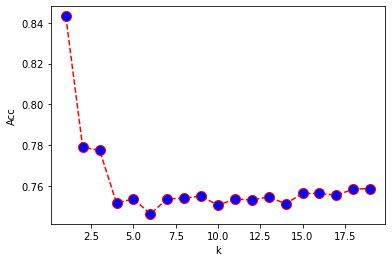

In [42]:
def cross_vali_knn(X,y,scoring_param):
    k_values = [i for i in range(1,20)]
# Empty list that will hold cv scores.
    k_acc_scores = []
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k,n_jobs=-1)
        cv_scores = cross_val_score(knn,X,y,cv = 5,scoring=scoring_param)
        k_acc_scores.append(cv_scores.mean())

    optimal_k = k_values[k_acc_scores.index(max(k_acc_scores))]
    print('optimal k value is {}'.format(optimal_k))
    plt.plot(k_values,k_acc_scores,color='red',linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10)
    plt.xlabel("k")
    plt.ylabel("Acc")
    plt.show()
    
    return (optimal_k)
scoring_param = cross_vali_knn(X_train, y_train, 'accuracy')

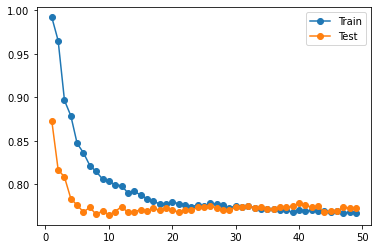

In [43]:
train_scores, test_scores = [], []
values = [i for i in range(1, 50)]
for i in values:
# configure the model
    model = KNeighborsClassifier(n_neighbors=i)
# fit model on the training dataset and evaluate on the train dataset
    model.fit(X_train, y_train)
    train_predict = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_predict)
    train_scores.append(train_acc)
    test_predict = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_predict)
    test_scores.append(test_acc)
# plot of train and test scores vs number of neighbors
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

Through the cross validation method, I got k = 1. However, I did not use it because when k = 1, it is very sensitive to all sort of distortions like noise and outliers.From the above graph,we can see when k = 1,the train accuracy score is up to near 100% while test accuracy score only exceed 85%. A very small value of k like k =1 has the risk to overfitting. So I will use default value(k=5).

I use Euclidean Distance (hyperparameter: p = 2) to train the model.The euclidean distance can measure the length of a segment connecting the two points and calculate the shortest distance between two points.

In [44]:
# Fit model hyperparameters with n_neighbors = 5 and p = 2
knn = KNeighborsClassifier(n_neighbors = 5, p = 2)
knn.fit(X_train,y_train)
accuracy_list = []
recall_list = []
auc_list = []
f1_list = []
precision_list = []
# cross-validation on training set
accuracy_list.append(cross_val_score(knn, X_train, y_train, scoring = "accuracy", cv = 5).mean())
recall_list.append(cross_val_score(knn, X_train, y_train, scoring = "recall", cv = 5).mean())
auc_list.append(cross_val_score(knn, X_train, y_train, scoring = "roc_auc", cv = 5).mean())
f1_list.append(cross_val_score(knn, X_train, y_train, scoring = "f1", cv = 5).mean())
precision_list.append(cross_val_score(knn, X_train, y_train, scoring = "precision", cv = 5).mean())

## Decision Tree classifier

 hyperparameters:
 - max_depth: The maximum depth of the tree. First, get each max depth (the range is set to within 50) corresponding to the accuracy score of the training set and the accuracy score of the test set. If accuracy score in the training set is much greater than accuracy score in the test set, I will not consider to select the corresponding max depth.
 
 - criterion = 'gini': It measures the frequency at which any element of the dataset will be mislabelled when it is randomly labeled. The gini criterion is much faster than entropy with less computationally expensive. The results of gini are very close to entropy, so we do not need to use the entropy criterion and spend too much time in training. 
( https://quantdare.com/decision-trees-gini-vs-entropy/ )

1, train: 0.7275, test: 0.7295
2, train: 0.7275, test: 0.7295
3, train: 0.7563, test: 0.7676
4, train: 0.7583, test: 0.7705
5, train: 0.7658, test: 0.7628
6, train: 0.7791, test: 0.7768
7, train: 0.7942, test: 0.7739
8, train: 0.8090, test: 0.7903
9, train: 0.8308, test: 0.7932
10, train: 0.8514, test: 0.8126
11, train: 0.8759, test: 0.8261
12, train: 0.8994, test: 0.8256
13, train: 0.9179, test: 0.8343
14, train: 0.9353, test: 0.8531
15, train: 0.9506, test: 0.8565
16, train: 0.9619, test: 0.8676
17, train: 0.9694, test: 0.8662
18, train: 0.9775, test: 0.8681
19, train: 0.9827, test: 0.8710
20, train: 0.9880, test: 0.8729
21, train: 0.9901, test: 0.8783
22, train: 0.9919, test: 0.8763
23, train: 0.9932, test: 0.8710
24, train: 0.9935, test: 0.8744
25, train: 0.9936, test: 0.8696
26, train: 0.9937, test: 0.8739
27, train: 0.9940, test: 0.8676
28, train: 0.9942, test: 0.8739
29, train: 0.9942, test: 0.8705
30, train: 0.9942, test: 0.8700
31, train: 0.9942, test: 0.8681
32, train: 0.9942

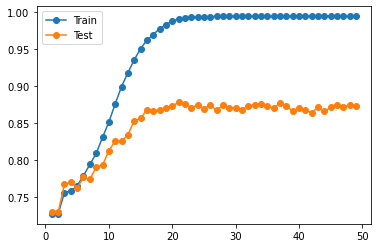

In [45]:
train_scores, test_scores = [], []
values = [i for i in range(1, 50)]
for i in values:
# configure the model
    model = DecisionTreeClassifier(max_depth=i)
# fit model on the training dataset and evaluate on the train dataset
    model.fit(X_train, y_train)
    train_predict = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_predict)
    train_scores.append(train_acc)
    test_predict = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_predict)
    test_scores.append(test_acc)
        # print out progress
    print('%d, train: %.4f, test: %.4f' % (i, train_acc, test_acc))
# plot of train and test scores vs number of neighbors
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

When the max_depth exceeds 20, the accuracy of the train is close to 100% gradually, but the accuracy is maintained at around 87%. Even when max depth starts from 48, the accuracy score slowly decreases. Therefore, to improve the accuracy and reasonableness of the model prediction, I will choose ten as the value of max depth. The reason is that I prefer the accuracy of the test set to be above 80%, and then the accuracy difference between the training set and the test set is not to be too large.

In [46]:
dt = DecisionTreeClassifier(random_state=25,max_depth=10,criterion = 'gini',
                             class_weight = "balanced")
DT = dt.fit(X_train, y_train)

In [47]:

# cross-validation on training set
accuracy_list.append(cross_val_score(DT, X_train, y_train, scoring = "accuracy", cv = 5).mean())
recall_list.append(cross_val_score(DT, X_train, y_train, scoring = "recall", cv = 5).mean())
auc_list.append(cross_val_score(DT, X_train, y_train, scoring = "roc_auc", cv = 5).mean())
f1_list.append(cross_val_score(DT, X_train, y_train, scoring = "f1", cv = 5).mean())
precision_list.append(cross_val_score(DT, X_train, y_train, scoring = "precision", cv = 5).mean())

## XGBoost

n_estimators : The number of estimators as selected by early stopping (if n_iter_no_change is specified). Otherwise it is set to n_estimators. Get each n_estimators (the range is set to within 50) corresponding to the accuracy score of the training set and the accuracy score of the test set. In the case of ensuring that the accuracy of the test set reaches 80%, I will consider choosing a smaller estimator, which can speed up the computing speed. Also, the accuracy of the train is not far away from the accuracy of test set.

objective : specifying a binary classification task. 

[23:04:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
1, train: 0.7793, test: 0.7768
[23:04:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
2, train: 0.7897, test: 0.7855
[23:04:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
3, train

27, train: 0.8453, test: 0.8058
[23:04:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
28, train: 0.8455, test: 0.8053
[23:04:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
29, train: 0.8491, test: 0.8053
[23:04:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to 

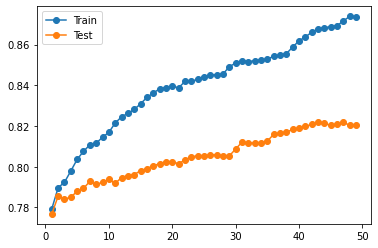

In [48]:
train_scores, test_scores = [], []
values = [i for i in range(1, 50)]
for i in values:
# configure the model
    model = XGBC(n_estimators=i)
# fit model on the training dataset and evaluate on the train dataset
    model.fit(X_train, y_train)
    train_predict = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_predict)
    train_scores.append(train_acc)
    test_predict = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_predict)
    test_scores.append(test_acc)
        # print out progress
    print('%d, train: %.4f, test: %.4f' % (i, train_acc, test_acc))
# plot of train and test scores vs number of neighbors
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

In [49]:
xgb_clf = XGBC(random_state=25,n_estimators=16,objective='binary:logistic')
xgb = xgb_clf.fit(X_train, y_train)

[23:04:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [50]:

accuracy_list.append(cross_val_score(xgb, X_train, y_train, scoring = "accuracy", cv = 5).mean())
recall_list.append(cross_val_score(xgb, X_train, y_train, scoring = "recall", cv = 5).mean())
auc_list.append(cross_val_score(xgb, X_train, y_train, scoring = "roc_auc", cv = 5).mean())
f1_list.append(cross_val_score(xgb, X_train, y_train, scoring = "f1", cv = 5).mean())
precision_list.append(cross_val_score(xgb, X_train, y_train, scoring = "precision", cv = 5).mean())

[23:04:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:04:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:04:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:04:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

## Naive Bayes

Customer churn is one of the major used application of Naive Bayes. Use the Naive bayes algorithm to calculate the probability of each attribute.Then calculate if a person churn or not churn from the service.

In [51]:
naive_bayes_Gb = GaussianNB()
gb = naive_bayes_Gb.fit(X_train, y_train)

In [52]:
accuracy_list.append(cross_val_score(gb, X_train, y_train, scoring = "accuracy", cv = 5).mean())
recall_list.append(cross_val_score(gb, X_train, y_train, scoring = "recall", cv = 5).mean())
auc_list.append(cross_val_score(gb, X_train, y_train, scoring = "roc_auc", cv = 5).mean())
f1_list.append(cross_val_score(gb, X_train, y_train, scoring = "f1", cv = 5).mean())
precision_list.append(cross_val_score(gb, X_train, y_train, scoring = "precision", cv = 5).mean())

# Select model

In [53]:
# Cross validation.
performance_metrics = pd.DataFrame()
performance_metrics['Models'] = ['KNN Model', 'Decision tree', 'XG boost','Gaussian Naive Bayes']
performance_metrics['Indep. Vars'] = [22,22,22,22]
performance_metrics['Recall'] = recall_list
performance_metrics['Accuracy'] = accuracy_list
performance_metrics['Precision'] = precision_list
performance_metrics['AUC'] = auc_list
performance_metrics['F1_score'] = f1_list
performance_metrics = performance_metrics.copy()
performance_metrics

,Models,Indep. Vars,Recall,Accuracy,Precision,AUC,F1_score
0,KNN Model,22,0.812848,0.753806,0.726124,0.831273,0.766936
1,Decision tree,22,0.867636,0.789562,0.749708,0.845148,0.804281
2,XG boost,22,0.838788,0.795119,0.770708,0.872270,0.803254
3,Gaussian Naive Bayes,22,0.862788,0.733874,0.685346,0.814762,0.763795


I preferred XG boost. Because the train set of XGboost got the highest accuracy, precision,AUC and F1 score among the 4 models.


In [54]:
predicted = xgb.predict(X_test)
predicted

array([1, 0, 0, ..., 1, 1, 1])

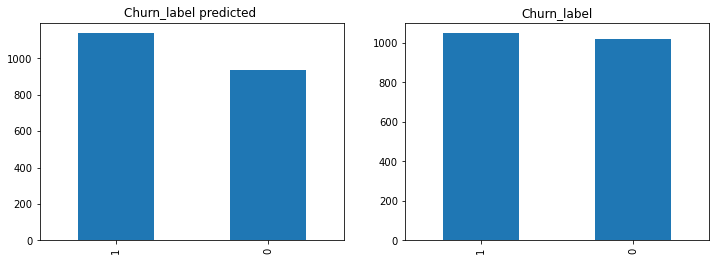

predicted:  1    1137
0     933
Name: Churn_label, dtype: int64
1    1049
0    1021
Name: label, dtype: int64


In [55]:
# Make two bar plots to display the actual and predict reg_pct_level data distribution 
predicted1 = pd.DataFrame(predicted,columns=['Churn_label'])
plt.figure(figsize=(12,4))
# Plot 1 
plt.subplot(1,2,1)
predicted1.Churn_label.value_counts().plot(kind='bar');
plt.title('Churn_label predicted ')
# Plot 2
plt.subplot(1,2,2)
y_test.value_counts().plot(kind='bar');
plt.title('Churn_label')
plt.show()

print("predicted: ",predicted1.Churn_label.value_counts())
print(y_test.value_counts())

The above figure compares XGboost's prediction on the test set and the actual label value. We can clearly see that the error value between them is not enormous. 

In [56]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predicted1))
print(classification_report(y_test, predicted1))

[[769 252]
 [164 885]]
              precision    recall  f1-score   support

           0       0.82      0.75      0.79      1021
           1       0.78      0.84      0.81      1049

    accuracy                           0.80      2070
   macro avg       0.80      0.80      0.80      2070
weighted avg       0.80      0.80      0.80      2070



From the above information, my selected model can classify most of the observations in the testing set. Only 416(164+252) observations were misclassified. The accuracy is 80%, better than the training set accuracy (79.51%). 

## Ensemble model

In this section, I created an ensemble model comprised of appropriate"weak learners." I considered a robust ensemble model that achieves better performance in the earlier metrics. I will use the concept of stacking to train the data. In this project, the weak learners are the  KNN, Decision Tree, and SVM. I decide to learn a logistic regression(default) as a meta-model. Then the logistic regression takes the outputs of sub-models as input and attempts to learn how to combine the input predictions best to make a better output prediction.

In [57]:
base_models = [('cart', DecisionTreeClassifier(max_depth=10)),
               ('svm', SVC()),
               ('knn', KNeighborsClassifier(n_neighbors=5))]
meta_model = LogisticRegressionCV()
stacking_model = StackingClassifier(estimators=base_models, 
                                    final_estimator=meta_model, 
                                    passthrough=True, 
                                    cv=5,
                                    verbose=2)
ensemble = stacking_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.7s finished


In [58]:
recall_list.append(np.mean(cross_val_score(ensemble,  X_train, y_train, scoring = 'recall', cv = 5)))
f1_list.append(np.mean(cross_val_score(ensemble,  X_train, y_train, scoring = 'f1', cv = 5)))
precision_list.append(np.mean(cross_val_score(ensemble,  X_train, y_train, scoring = 'precision', cv = 5)))
accuracy_list.append(np.mean(cross_val_score(ensemble,  X_train, y_train, scoring = 'accuracy', cv = 5)))
auc_list.append(np.mean(cross_val_score(ensemble, X_train, y_train, scoring = "roc_auc", cv = 5)))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Paral

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s finished


In [60]:
# Cross validation.
performance_metrics = pd.DataFrame()
performance_metrics['Models'] = ['KNN Model', 'Decision tree', 'XG boost','Gaussian Naive Bayes','ensemble']
performance_metrics['Indep. Vars'] = [22,22,22,22,22]
performance_metrics['Recall'] = recall_list
performance_metrics['Accuracy'] = accuracy_list
performance_metrics['Precision'] = precision_list
performance_metrics['AUC'] = auc_list
performance_metrics['F1_score'] = f1_list
performance_metrics = performance_metrics.copy()
performance_metrics

,Models,Indep. Vars,Recall,Accuracy,Precision,AUC,F1_score
0,KNN Model,22,0.812848,0.753806,0.726124,0.831273,0.766936
1,Decision tree,22,0.867636,0.789562,0.749708,0.845148,0.804281
2,XG boost,22,0.838788,0.795119,0.770708,0.872270,0.803254
3,Gaussian Naive Bayes,22,0.862788,0.733874,0.685346,0.814762,0.763795
4,ensemble,22,0.843636,0.794758,0.766680,0.873024,0.804167


__Ensemble vs XGboost__: 
As I guess, ensemble performs a little better than xgboost. However, the difference in scores between them is not very big.

In [61]:
# predict class labels for the test set
predicted = ensemble.predict(X_test)
predicted

array([1, 0, 0, ..., 1, 1, 1])

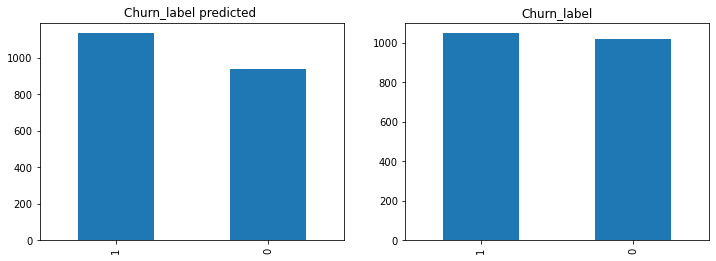

predicted:  1    1134
0     936
Name: Churn_label, dtype: int64
1    1049
0    1021
Name: label, dtype: int64


In [62]:
# Make two bar plots to display the actual and predict reg_pct_level data distribution 
predicted1 = pd.DataFrame(predicted,columns=['Churn_label'])
plt.figure(figsize=(12,4))
# Plot 1 
plt.subplot(1,2,1)
predicted1.Churn_label.value_counts().plot(kind='bar');
plt.title('Churn_label predicted ')
# Plot 2
plt.subplot(1,2,2)
y_test.value_counts().plot(kind='bar');
plt.title('Churn_label')
plt.show()

print("predicted: ",predicted1.Churn_label.value_counts())
print(y_test.value_counts())

The above figure compares ensemble model prediction on the test set and the actual label value. We can clearly see that the error value shows less than  XGboost. 

In [63]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predicted1))
print(classification_report(y_test, predicted1))

[[791 230]
 [145 904]]
              precision    recall  f1-score   support

           0       0.85      0.77      0.81      1021
           1       0.80      0.86      0.83      1049

    accuracy                           0.82      2070
   macro avg       0.82      0.82      0.82      2070
weighted avg       0.82      0.82      0.82      2070



The ensemble model can classify most of the observations in the testing set. Only 375(230+145) observations were misclassified and the number of misclassification is less than XGboost's.The accuracy is 82%, better than the training set accuracy (79.47%). 

# Conclusion

- Before constructing predictive modeling, I cleaned the dataset. I performed appropriate EDA, creating bar charts and count plots for categorical data, histograms, and boxplots for numerical data. 
- In the data preparation part, I did Minmax standardization to adjust the numerical data on the same scale. I applied feature selection (Selectkbest chi2) to choose categorical variables for inclusion within the models. 
- Applied KNeighborsClassifier algorithm, Decision Tree classifier, XGBoost, Naive Bayes model, an ensemble model to the data. The total explanatory variables in the training dataset are 22. I had done experiments and found 22 variables are appropriate to improve the prediction scores. 
- Get the output of each model's AUC, F1, recall, and precision scores, and compare the scores among those models. The ensemble model has the highest scores among the models as well as I expected. The accuracy in the testing set performed better than the training set accuracy.
- Due to time constraints, I only tune a small part of the parameters. In future work, I should test other parameters to improve the model's accuracy further.

# Reference
- https://towardsdatascience.com/a-practical-guide-to-stacking-using-scikit-learn-91e8d021863d
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html
- https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/
- https://machinelearningmastery.com/overfitting-machine-learning-models/
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
- https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6
- https://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes
- https://towardsdatascience.com/selecting-optimal-parameters-for-xgboost-model-training-c7cd9ed5e45e
- https://www.dataspoof.info/post/in-depth-understanding-of-naive-bayes-classifier-and-its-implementation-in-python/

### Thank you from Shichao Zhou.